## 주제
#### 클러스터링기반 코로나와 대중교통 사용률 분석과 감염가능성을 낮추는 대중교통 운용방법
##### (포스트 코로나 시대의 대중교통 저밀도화 및 짧은이동시간화)

## 배경지식
코로나 전염병으로 인해 교통의 패러다임이 변화하고 있습니다. 신체접촉이 쉬운 대중교통 사용자는 큰 폭으로 줄고 있고 개인화된 자동차를 통한 이동량이 증가하고 있습니다.

이러한 변화는 경제적,환경적,사회적 문제를 일으킬 수 있습니다. 
1. 사회적 문제 : 대중교통으로 인한 감염가능성 증가, 대중교통에 대한 부정적 인식 증가 
2. 경제적 문제 : 대중교통을 운영하는 회사들의 운영난과 실업률 증가
3. 환경적 문제 : 개인 자동차 사용으로 인한 대기오염 문제 발생

## 문제점
대중교통 사용자가 줄고 있으며 전염병에 취약해져 시민들의 안전한 이동을 보장하지 못합니다. 이유는 아래와 같습니다.
1. 밀도가 매우 높은 대중교통은 신체 접촉이 쉬워, 코로나와 같은 전염병에 취약할 수 있습니다.
2. 대중교통은 이동속도가 오래 걸리기 때문에, 전염병에 노출될 시간/확률이 늘어납니다. 

## 해결방법 
데이터 분석을 활용해 대중교통 시스템을 유연화시키고 감경가능성 최소화 및 시스템 변화 방법을 고안합니다. 

## 목차
 <ul>
<li> 0. 코로나 시대의 도래
<ul>
<li>확진자 추이를 통해본 코로나 전/후 시대</li>
</ul>
<li>1. 코로나 시대 이후 대중교통량의 변화</li>
<li>2. 대중교통 문제를 해결할 수 있는 방법을 제안
<ul>
<li>2-1. 대중교통의 고밀도 문제 해결
<ul>
<li> 1) 노선별 이용량 분석을 통한 고밀도 문제 해결
<li> 2) Mobility 데이터 분석을 통한 고밀도 문제 해결
</ul>
</li>
<li>2-2. 대중교통의 긴 이동시간 문제 해결
<ul>
<li> 1) 정류장별 이용량 분석을 통한 긴이동시간 문제 해결
</ul>
</li>
<li>2-3. 고밀도, 긴 이동시간 문제 해결에 따른 side effect 보완방법
<ul>
<li> 1) 공공자전거 활용을 통한 대중교통 시스템 변화에 따른 문제점 보완 
</ul>
</li>
</ul>
<li> 3. 결론 및 제언 : 향후 정책에 반영할 점들</li>
 </ul>
  
  
## 데이터
<b>1. 공모전 데이터</b>
<ul>
<li> COVID-19 데이터
<ul>
<li>Time</li>
</ul>
</li>
<li> 교통카드 데이터 
<ul>
<li>정류장별 이용량</li>
<li>노선별 이용량</li>
<li>지역코드</li>
</ul>
</li>
</ul>


<b>2. 외부 데이터</b>
<ul>
<li> Google Mobility Data</li>
<li> 서울시 열린광장 데이터 
<ul>
<li>서울시 공공자전거 사용량 데이터 </li>
<li>정류장 위치 정보 데이터 </li>
</ul>
</li>
</ul>



## 분석 기술
- paddas를 통한 데이터 전처리
- pyspark를 활용한 feature engineering
- 시계열 데이터 분석을 위한 time series k-means clustering 
- 시각화툴 사용(matplotlib, seaborn)

## 결과 및 제언 
- 노선별, 정류장별 코로나 시대 이후 사용량 변화 특성을 활용합니다.
- 이 특성을 활용해 대중교통 유연한 운행량 조절로 대중교통의 고밀도, 긴이동시간 문제를 해결합니다. 또한, 주기적인 데이터 분석기반 운행량 조절로 스마트한 대중교통 시스템을 구축합니다.
- 대중교통의 유연한 운행량 조절로 발생할 수 있는 문제점을 보완하기 위해 공공자전거, 공유자동차 서비스 제공을 확대합니다.

## 한계
- 서울특별시 기반의 데이터 분석으로 전국적인 분석이 필요합니다. 

## 저작물
- 본 저작물의 저작권은 Apache License v2.0을 따릅니다

# 필요 library 설치 및 import

In [3]:
%sh
pip install tslearn
pip install folium

In [4]:
spark.conf.set("spark.sql.execution.arrow.enabled", "true") # For making conversion of pandas effective

import datetime
import collections
import folium

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from pyspark.sql.functions import *
from pyspark.sql.types import *

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

from tslearn.clustering import TimeSeriesKMeans

# 0. 코로나 시대의 도래

In [6]:
pdf = pd.read_csv("/dbfs/Time.csv")
pdf.head()

,date,time,test,negative,confirmed,released,deceased
0,2020-01-20,16,1,0,1,0,0
1,2020-01-21,16,1,0,1,0,0
2,2020-01-22,16,4,3,1,0,0
3,2020-01-23,16,22,21,1,0,0
4,2020-01-24,16,27,25,2,0,0


### 아래 코로나 확진자 수 추이를 통해서, 2020년 2월21을 기점(빨간선)으로 코로나 확진자 수가 급격히 증가합니다.
### 즉, 2020년 2월 20일 전은 코로나 전시대이며, 2020년 2월 20일 후는 코로나 후시대입니다.

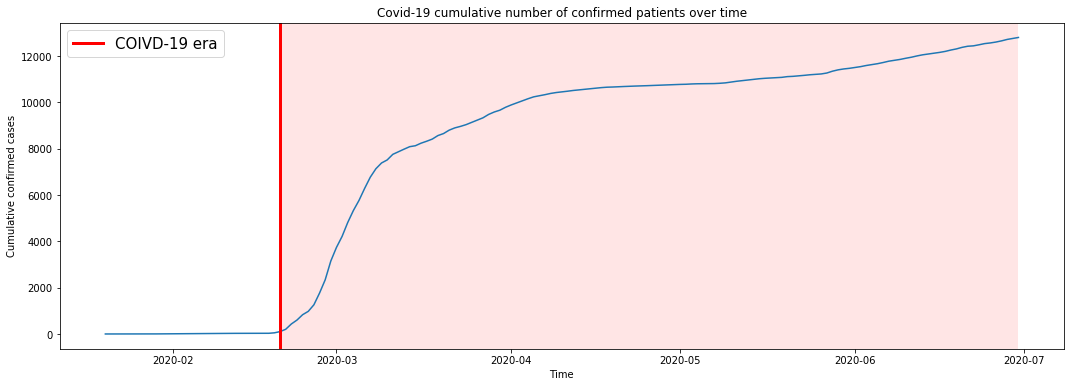

In [8]:
plt.figure(figsize=(18,6))
plt.plot(pd.to_datetime(pdf['date'],format='%Y-%m-%d'),pdf['confirmed'])
plt.axvline(x=pd.to_datetime("2020-02-20"),color='red',label='COIVD-19 era',linewidth=3)
plt.axvspan(pd.to_datetime("2020-02-20"),pd.to_datetime("2020-06-30"),facecolor='red',alpha=0.1)
plt.legend(fontsize=15)
plt.xlabel("Time")
plt.ylabel("Cumulative confirmed cases")
plt.title("Covid-19 cumulative number of confirmed patients over time")
plt.show()

## 1. 코로나 시대 이후 대중교통량의 변화

In [10]:
pdf_tfby = pd.read_csv("/dbfs/DM_TFBY_USEV_SMY.dat",delimiter='|',header=None,names=['date','sd_code','sgg_code','tf_code','cnt'])
pdf_tf = pd.read_csv("/dbfs/DW_TFCMN.dat",delimiter='|',header=None,names=['tf_code','tf_name'])
pdf_tfby['date_month'] = pdf_tfby['date'].apply(lambda x: (int(x/100)))

In [11]:
def show_trans_analysis():
  temp = pdf_tfby[['date_month','cnt']].groupby('date_month').sum().reset_index()
  rank = temp['cnt'].argsort().argsort()
  pal = sns.color_palette("Blues_d", temp.shape[0]) # 사용량에 따른 bar의 색을 다르게 표현하기 위해 진행합니다. 직관적인 표현을 위함입니다.
  before_mean = int(temp[(temp['date_month']<202001) & (temp['date_month']>201902)]['cnt'].mean())
  after_mean = int(temp[(temp['date_month']>202002)]['cnt'].mean())
  plt.figure(figsize=(18,10))
  sns.barplot(x="date_month",y="cnt",data=temp,palette=np.array(pal[::-1])[rank])
  plt.axvspan(1.5, 4.5, color='red', alpha=0.2)
  plt.text(1,before_mean,'average : '+str(before_mean),size=25)

  plt.axvspan(6.5, 9.5, color='red', alpha=0.2)

  plt.text(1,before_mean,'average : '+str(before_mean),size=25)
  plt.text(6,after_mean,'covid-19 average : '+str(after_mean),size=25)
  plt.xticks(rotation=45, size=15, ha='right')
  plt.title("Changes in public transportation usage by covid-19", fontsize=35)
  plt.show()


### 아래와 같이 코로나 전/후로 대중교통 사용률은 급격하게 떨어졌습니다. 
### 코로나 발생하기 전 2019년 3월부터 5월 평균 사용횟수는 801906970번인 반면에, 2020년 3월부터 5월은 507600251번입니다. 
### 약 38%이상 하락했습니다.

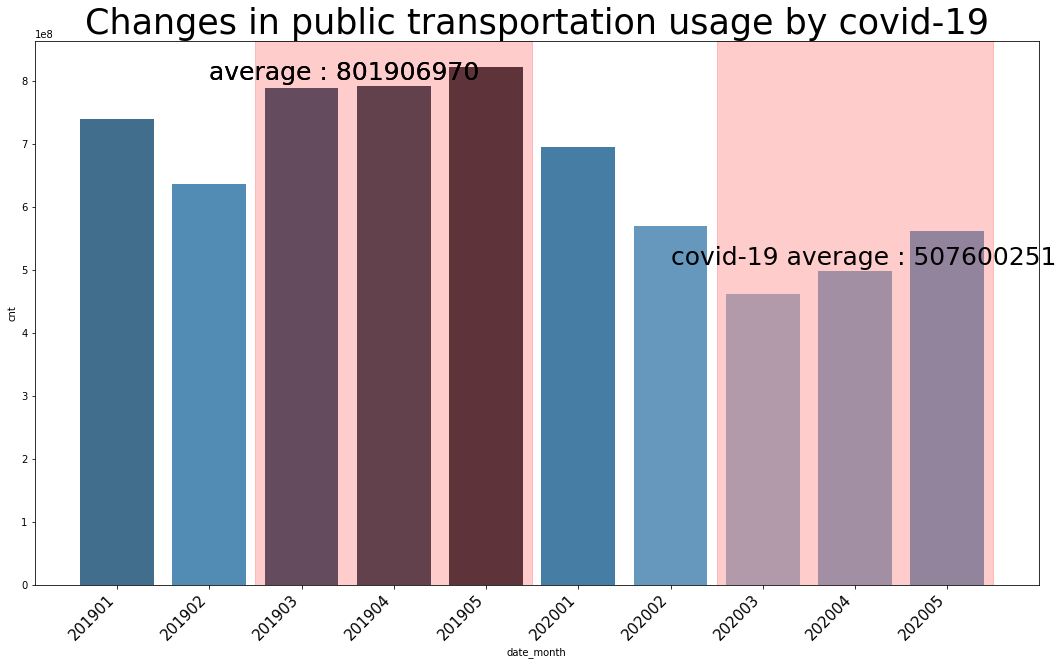

In [13]:
show_trans_analysis()

## 2. 대중교통 문제를 해결할 수 있는 방법을 제안

### 대중교통은 고밀도, 긴 이동시간으로 인해 전염병 감염가능성이 매우 높습니다. 이를 근본적으로 해결해 시민들에게 안정한 이동수단을 제공해야 합니다.

### 저는 아래와 같은 방법으로 해당 문제들을 해결하는 것을 제안합니다. 
 <ul>
<li> 1. 대중교통의 고밀도 문제 해결
<ul>
<li>문제점 : 대중교통 특성상 매우 밀도가 높아, 신체 접촉이 쉬우며 사회적 거리두기 실천이 어렵습니다</li>
<li>해결방법 : 코로나 이후 노선 사용률이 급격히 저하된 대중교통 운행을 줄이고, 노선 사용률이 증가하거나 떨어졌으나 여전히 사용자가 많은 노선의 대중교통 운행을 늘립니다. 이를 통해 동일한 대중교통 회사의 동일한 인력,resource내에서 유연한 변화를 통해 대중교통의 밀도를 낮출 수 있습니다</li>
</ul>
<li>2. 긴 이동시간 문제 해결
<ul>
<li>문제점 : 버스와 같은 대중교통은 많은 노선을 거치면서, 사용자의 출발점부터 도착점까지의 이동시간을 늘립니다.</li>
<li>해결방법 : 코로나 이후 정류장 사용률이 급격히 저하된 정류장을 노선에서 제거하는 방법으로 대중교통의 노선을 간소화합니다. 이를 통해 대중교통 이동시간을 최소화하고 감염 문제를 해결해야 합니다. </li>
</ul>
<li>3. 앞의 해결법에 의한 side effect과 해결법
<ul>
<li>문제점 : 두 해결법에 의해 일부 시민들은 이로 인해 피해를 받을 수 있습니다. 예를 들어 특정 정류장이 노선에서 배제되게 될 수 있습니다.</li>
<li>해결방법 : 공공자전거와 공유자동차 서비스를 해당 지역에 확대/제공해서 문제를 해결할 수 있습니다.  </li>
</ul>
 </ul>

---
## 2-1. 대중교통의 고밀도 문제 해결 & 데이터 분석 (서울특별시 기준)
 ### - 1) 코로나 전/후로 노선별 사용량 추이를 분석합니다. 클러스터링 기법을 활용해서 노선별 사용량 변화를 분석합니다. 이를 이용해 운행을 보충 및 감소 시킬 노선을 정하고 이를 시행합니다. 
 ### - 2) 코로나 전/후 사람들의 mobility 데이터 변화를 분석해, 포스트코로나시대에 사람들이 많이 이용할 지역을 분석하고 해당 지역 노선을 확장해야 합니다.
 ### - 결론적으로 이를 통해 대중교통 저밀도화로 시민들에게 안전한 대중 교통을 제공할 수 있습니다.

### 2-1. 1) 코로나 전/후 노선 사용량을 클러스터링(군집화) 분석합니다.

In [18]:
route_data = pd.read_csv("/dbfs/DM_ROUTE_USEV_SMY.dat",delimiter='|',header=None,names=['date','sd_code','sgg_code','tcbo_id','area_code','cb_code','route_id','route_no','route_name','use_cnt']) # 노선 데이터를 import 합니다.
route_data['date_month'] = route_data['date'].apply(lambda x: int(x/100)) # Y-M-D 데이트 구조를 Y-M로 변환합니다.
seoul_data = route_data[route_data['sd_code']==11]  # 서울시 데이터만을 필터링합니다.

#### 2019년1월~2020년5월까지 월별 노선별 사용량은 아래와 같습니다.

In [20]:
seoul_data_sum = seoul_data.groupby(['date_month','route_name','route_id']).sum().reset_index() # 노선별 사용량 데이터를 월별로 GROUPBY 진행합니다. 
seoul_data_sum[["date_month","route_name","use_cnt"]].head()

,date_month,route_name,use_cnt
0,201901,0017번(청암동이촌동),180888
1,201901,02번(남산서울타워동대입구),72204
2,201901,03번(남산서울타워남산서울타워),27764
3,201901,03번(시청앞시청앞),10625
4,201901,05번(남산서울타워남산서울타워),48908


#### "0017번(청암동이촌동)"노선은 아래와 같은 추이를 보입니다. 즉, 코로나 이후 노선의 이용량이 감소했습니다.
#### 하지만 모든 노선의 이용량 변화를 일일이 확인할 수 없습니다.
### 그래서 저는 클러스터링 기법을 활용해 노선들의 이용량 변화를 분석하고자 합니다.

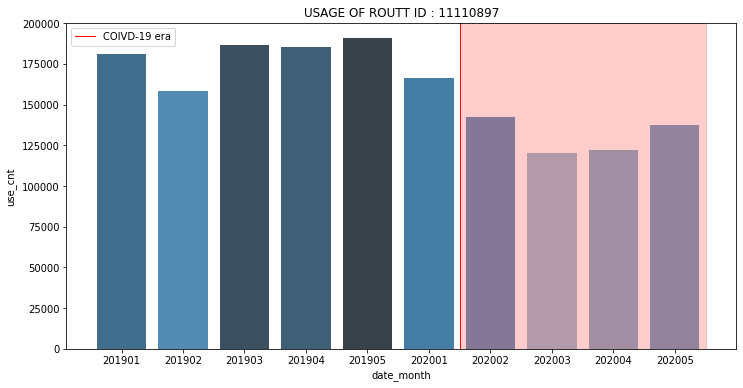

In [22]:
plt.figure(figsize=(12,6))
sample_data = seoul_data_sum[seoul_data_sum['route_id']==11110897] # 0017번(청암동이촌동) 노선의 사용률 변화를 봅니다. 
pal = sns.color_palette("Blues_d", sample_data.shape[0]) 
rank = sample_data['use_cnt'].argsort().argsort() # 이용량에 따라 색을 다르게해 시각화된 이미지의 직관성을 높입니다.
sns.barplot(x="date_month",y="use_cnt",data=sample_data,palette=np.array(pal[::-1])[rank]) 
plt.axvline(5.5,color='red',label='COIVD-19 era',linewidth=1)
plt.axvspan(5.5, 9.5, color='red', alpha=0.2)
plt.legend()
plt.title("USAGE OF ROUTT ID : 11110897")

In [23]:
def convert_date_index(x): #feature engineering을 위해 y-m을 index로 변환합니다.
  x = int(x)
  if x == 201901:
    return 1
  elif x == 201902:
    return 2
  elif x == 201903:
    return 3
  elif x == 201904:
    return 4
  elif x == 201905:
    return 5
  elif x == 202001:
    return 6
  elif x == 202002:
    return 7
  elif x == 202003:
    return 8
  elif x == 202004:
    return 9
  elif x == 202005:
    return 10
  return -1
udf_convert_date_index = udf(convert_date_index,IntegerType())

### 클러스터링 분석을 위해 노선별 사용량 데이터를 시계열 데이터로 만드는 feature engineering 작업을 진행합니다.
#### pyspark, scala, pandas를 복합적으로 활용해 진행했습니다.

In [25]:
df = spark.createDataFrame(seoul_data_sum[["date_month","route_name","route_id","use_cnt"]]).cache() #노선별 사용량의 feature engineering을 위해 pandas dataframe을 spark dataframe으로 변환합니다.
df.withColumn("date_index",udf_convert_date_index("date_month")).write.mode("overwrite").parquet("/dbfs/df_route_cnt/") # 변환된 spark dataframe 임시로 저장합니다.

In [26]:
%scala
val df = spark.read.parquet("/dbfs/df_route_cnt/") // scala spark가 익숙해 저장된 dataframe을 불러옵니다. 
val df_feature = df.select("date_month","route_name","route_id","use_cnt","date_index").as[(Double,String,Double,Double,Double)]
  .groupByKey{case(date_month,route_name,route_id,use_cnt,date_index)=>(route_name)}
  .mapGroups{case(key,value)=>
    val valueSeq = value.toSeq
    val valueMap = valueSeq.map{case(date_month,route_name,route_id,use_cnt,date_index)=>(date_index-1,use_cnt)}.toMap
    val featureArray = Array.fill(10)(0.0).zipWithIndex.map{case(value,index)=>
           valueMap.getOrElse(index, 0.0)           
    }
    (key,featureArray)
    
  }
.toDF("route_name","feature")
df_feature.write.mode("overwrite").parquet("/dbfs/df_route_use_feature/") // 작업이 완료된 노선별 사용량의 시계열 데이터를 저장합니다.

df: org.apache.spark.sql.DataFrame = [date_month: bigint, route_name: string ... 3 more fields]
df_feature: org.apache.spark.sql.DataFrame = [route_name: string, feature: array<double>]

### 최종 완성된 feature는 아래와 같습니다. 각 노선별 사용량의 시계열 데이터입니다.

In [28]:
df_feature = spark.read.parquet("/dbfs/df_route_use_feature/")
df_feature.show()

+---------------------------------+--------------------+
 route_name| feature|
+---------------------------------+--------------------+
 121번(화계사서울숲)|[408964.0, 344418...|
 1224번(상계동청량리)|[538030.0, 477664...|
 2234(중랑공영차고지봉화산역)|[68541.0, 57301.0...|
 5633번(노온사동순복음교회)|[242559.0, 211640...|
 600번(온수동광화문)|[566826.0, 482030...|
 662번(외발산동여의나루역)|[168233.0, 147686...|
 능곡초등학교-능곡초교|[7658.0, 6094.0, ...|
 대진대.학생회관-대진대.학생회관|[124653.0, 108208...|
 도봉02(우이동도선사입구수유역)|[161346.0, 136822...|
 서초01(잠원역반포고등학교)|[8183.0, 7121.0, ...|
 성공회앞-안중초교|[2.0, 0.0, 0.0, 0...|
 성북03(삼선푸르지오아파트노인정)|[92424.0, 78498.0...|
 성북08(신안아파트길음역)|[170676.0, 145357...|
 성호아파트-성호아파트|[30976.0, 25441.0...|
소하동광명동굴입-소하동광명동굴입|[66833.0, 56110.0...|
 항동7가버스차고-항동7가버스차고|[0.0, 0.0, 0.0, 9...|
 3212번(강동공영차고지강변역)|[100454.0, 91988....|
 5627번(노온사동구로디지털단지역)|[97015.0, 85514.0...|
 6008번(영등포)|[17609.0, 15269.0...|
 6628번(외발산동여의도)|[563154.0, 477580...|
+---------------------------------+--------------------+
only showing top 20 rows

In [29]:
df_npy = np.array(df_feature.collect()) # spark dataframe을 numpy로 변환합니다.
name_npy = np.array([np.array(x) for x in df_npy[:,0]])   #노선의 이름을 저장하는 데이터 변수입니다.
feature_npy = np.array([np.array(x) for x in df_npy[:,1]]) #노선의 시계열 데이터를 저장하는 데이터 변수입니다.

def normalization_axis(feature): #시계열 데이터의 효율적인 클러스터링을 위해 normalization을 진행합니다.
  sum_npy = np.array([x/np.sum(x) for x in feature])
  return sum_npy

feature_norm_npy = normalization_axis(feature_npy)
feature_npy = np.array([np.array(x) for x in df_npy[:,1]])

/local_disk0/tmp/1599193920593-0/PythonShell.py:6: RuntimeWarning: invalid value encountered in true_divide
 import os

### 노선명이 제대로 입력되어 있지 않은 데이터들을 걸러내면 1238개의 노선 정보가 남습니다.

In [31]:
route_total = str(feature_norm_npy[~np.isnan(feature_norm_npy).any(axis=1)].shape[0])
print("서울시 노선수 : "+str(feature_norm_npy.shape[0]))
print("결측값을 제거한 서울시 노선수 : "+route_total)
feature_norm = feature_norm_npy[~np.isnan(feature_norm_npy).any(axis=1)]
feature = feature_npy[~np.isnan(feature_norm_npy).any(axis=1)]
name = name_npy[~np.isnan(feature_norm_npy).any(axis=1)]

서울시 노선수 : 1297
결측값을 제거한 서울시 노선수 : 1238

### Time series Clustering
### 하이퍼파라메터 튜닝을 통해 클러스터 10개로 노선들을 분류하는 것이 적합하다고 판단했습니다.

In [33]:
n_cluster = 10  #튜닝 작업을 거치며 10개로 결정했습니다.
km = TimeSeriesKMeans(n_clusters=n_cluster, metric="euclidean", max_iter=150).fit(feature_norm) # normalization 시계열 데이터를 활용해 euclidean 기반 클러스터링을 진행합니다.
rlt_tsm = km.predict(feature_norm)

/databricks/python/lib/python3.7/site-packages/tslearn/utils.py:91: UserWarning: 2-Dimensional data passed. Assuming these are 1238 1-dimensional timeseries
 '{} 1-dimensional timeseries'.format(X.shape[0]))

In [34]:
# 클러스터별 분포도를 시각화하기 위해 전처리 작업입니다.
labels = []
sizes = []
for i in range(n_cluster):
  labels.append("cluster_"+str(i))
  sizes.append(collections.Counter(rlt_tsm)[i])

### 클러스터링 결과 노선별로 사용량 변화에 따라서 크게 10개로 분류가 가능합니다.
### 또한 아래와 같은 비율로 분류됩니다. 

### PCA 차원축소를 이용해 클러스터의 분포를 확인해봤습니다. 
### 아래와 같이 이상적으로 노선 데이터의 분류가 이뤄진 것을 확인할 수 있습니다.

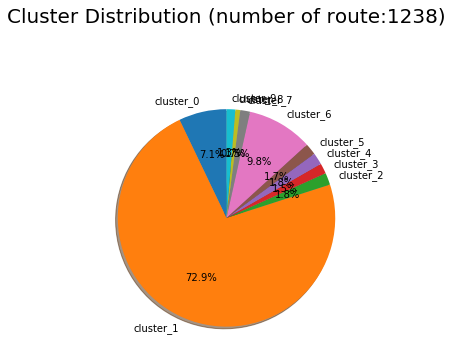

In [36]:
plt.figure(figsize=(10,5))
plt.pie(sizes,labels=labels,shadow=True,startangle=90,autopct='%1.1f%%')
plt.title("Cluster Distribution (number of route:"+route_total+")",position=(0.5,1.2),fontsize=20)

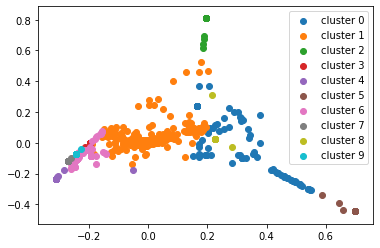

In [37]:
pca = PCA(n_components=2)  # pca를 진행해 클러스터가 얼마나 잘됐는지 검토합니다.
rlt_pca = pca.fit_transform(feature_norm_npy[~np.isnan(feature_norm_npy).any(axis=1)])
for i in range(n_cluster):
  label_name = "cluster " +str(i)
  plt.scatter(rlt_pca[[rlt_tsm==i]][:,0],rlt_pca[[rlt_tsm==i]][:,1],label=label_name)
plt.legend()

In [38]:
def show_cluster_dist(num_cluster,num_sample=50):
  plt.figure(figsize=(10,4))
  size = sizes[num_cluster]
  if(size>num_sample):
    size = num_sample
  for i in range(size):
    name = "cluster" + str(i) 
    plt.plot(['201901','201902','201903','201904','201905','202001','202002','202003','202004','202005'],feature_norm[[rlt_tsm==num_cluster]][i])
  plt.axvline(5.8,color='red',label='COIVD-19 era',linewidth=1)
  plt.axvspan(5.8, 9.5, color='red', alpha=0.2)  
  plt.xlabel("date")
  plt.ylabel("ratio of usage")
  plt.title("Changes in usage rate of some cluster "+str(num_cluster),fontsize=30)
  plt.legend()
  plt.show()

### 아래 클러스터별 노선들의 사용량 변화로 아래와 같은 분석을 할 수 있습니다.

|클러스터 종류|특성|노선수|
|------|---|---|
|0번|코로나 이후 노선사용률이 0에 수렴|19|
|1번|코로나 이후 노선사용률이 감소됨|928|
|2번|코로나 이후 노선사용률이 서서히 없어짐|22|
|3번|코로나 이후 노선사용률이 0에 수렴|22|
|4번|2019년에 노선 폐지가 예상됨|18|
|5번|코로나 이후 노선 사용률이 급격히 올라감|54|
|6번|코로나 이후 노선 사용률이 0에 수렴|16|
|7번|코로나 이후 노선 사용률이 급격히 올라감|21|
|8번|코로나 이후 노선 사용률이 서서히 떨어지며 매우 떨어짐|127|
|9번|코로나 이후 노선 사용률이 0에 수렴|11|

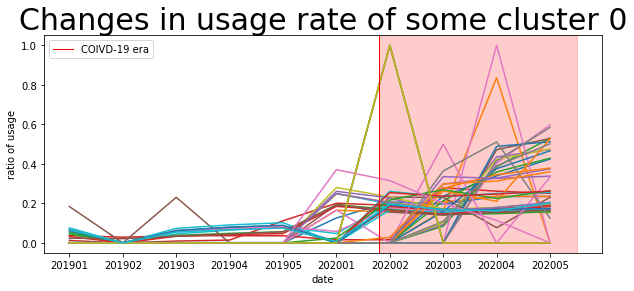

In [40]:
show_cluster_dist(0)

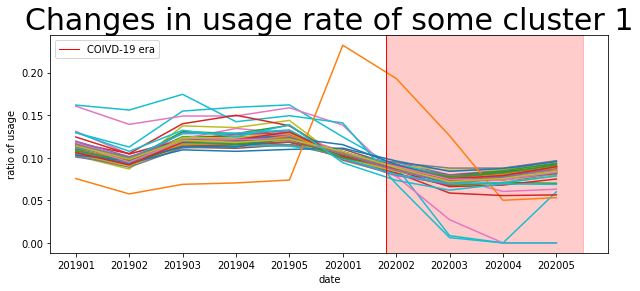

In [41]:
show_cluster_dist(1)

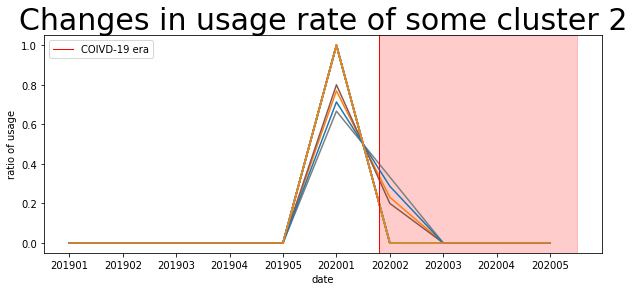

In [42]:
show_cluster_dist(2)

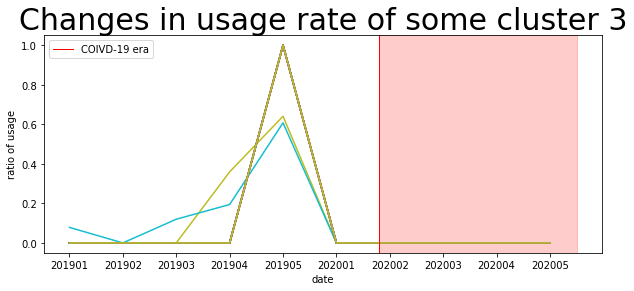

In [43]:
show_cluster_dist(3)

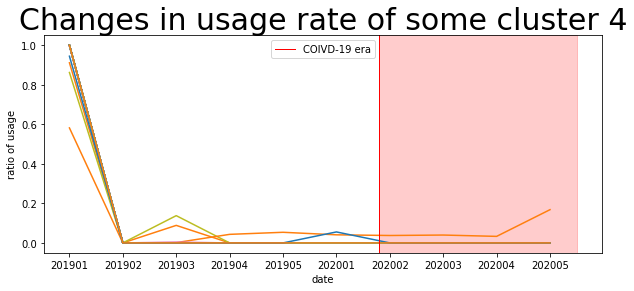

In [44]:
show_cluster_dist(4)

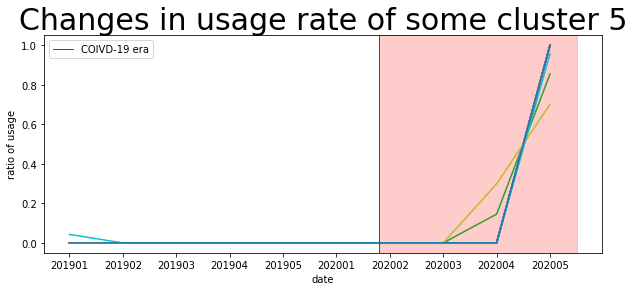

In [45]:
show_cluster_dist(5)

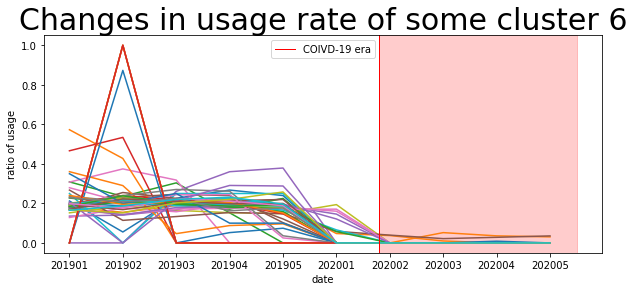

In [46]:
show_cluster_dist(6)

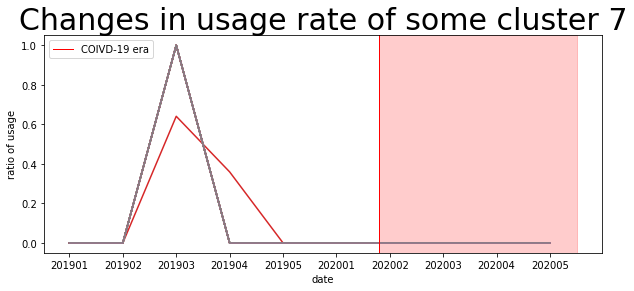

In [47]:
show_cluster_dist(7)

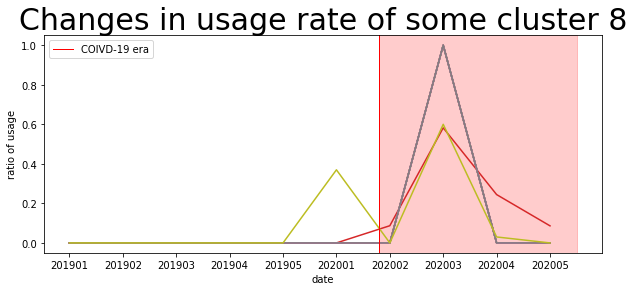

In [48]:
show_cluster_dist(8)

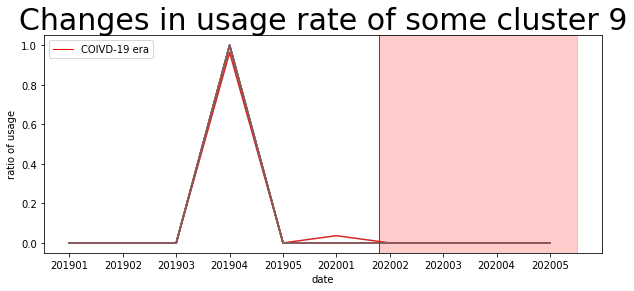

In [49]:
show_cluster_dist(9)

### - 노선 클러스터 분석을 통한 결론
#### 앞에 데이터 분석 결과와 같이 서울시 노선중에 코로나 발생이후 사용률이 급감하거나 0에 수렴하는 노선들이 존재합니다.
#### 즉, 0번,2번,3번,4번,6번,8번,9번 클러스터에 속한 노선들의 운행량을 감소시키고 5번,7번 클러스터에 속한 노선들의 운행량을 높여서 대중교통의 고밀도 문제를 해결할 수 있습니다. 
#### 이런 분석은 주기적으로 진행하고 운행량 조절을 유연하게 변화시켜 대중교통의 밀도를 낮게 항상 낮춰주는 것이 중요합니다.

#### 이어서 모빌리티 데이터를 통한 고밀도 문제해결 방법을 분석해보겠습니다.

### 2-1. 1) 구글 모빌리티 데이터를 활용해서 코로나 발생 이후 사람들이 어디를 많이 이동하는지를 분석한 뒤, 해당 지역 노선에 대한 운행량을 늘려야 합니다.

In [53]:
pdf_gm = pd.read_csv("https://www.gstatic.com/covid19/mobility/Global_Mobility_Report.csv") # google mobility data를 얻어옵니다.
pdf_gm_kr = pdf_gm[pdf_gm['country_region_code']=='KR'] # filter korea
pdf_gm_kr['date'] = pd.to_datetime(pdf_gm_kr['date'])
t = ['Monday','Tuesday','Wedseday','Thursday','Friday','Saturday','Sunday']
pdf_gm_kr['weekday'] = pdf_gm_kr['date'].apply(lambda x: x.weekday()) #날짜별 요일 데이터를 생성합니다.
pdf_gm_kr_weekday = pdf_gm_kr.groupby("weekday").mean().reset_index()

In [54]:
pdf_gm_kr.head()

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,weekday
997142,KR,South Korea,NaN,NaN,NaN,NaN,NaN,2020-02-15,-4.0,0.0,3.0,-6.0,1.0,3.0,5
997143,KR,South Korea,NaN,NaN,NaN,NaN,NaN,2020-02-16,-11.0,0.0,-31.0,-15.0,-3.0,4.0,6
997144,KR,South Korea,NaN,NaN,NaN,NaN,NaN,2020-02-17,-7.0,-6.0,-17.0,-6.0,0.0,5.0,0
997145,KR,South Korea,NaN,NaN,NaN,NaN,NaN,2020-02-18,-1.0,-3.0,-5.0,-3.0,2.0,2.0,1
997146,KR,South Korea,NaN,NaN,NaN,NaN,NaN,2020-02-19,-5.0,-1.0,14.0,-4.0,1.0,2.0,2


In [55]:
def google_show_mobility():
  plt.figure(figsize=(20, 10))
  plt.plot(pdf_gm_kr["date"], pdf_gm_kr[
  'retail_and_recreation_percent_change_from_baseline'], '-o', label='retail', color='red')
  plt.plot(pdf_gm_kr["date"], pdf_gm_kr[
  'grocery_and_pharmacy_percent_change_from_baseline'], '-o', label='grocery', color='gray')
  plt.plot(pdf_gm_kr["date"], pdf_gm_kr[
  'parks_percent_change_from_baseline'], '-o', label='parks', color='purple')
  plt.plot(pdf_gm_kr["date"], pdf_gm_kr[
  'transit_stations_percent_change_from_baseline'], '-o', label='transit', color='yellow')
  plt.plot(pdf_gm_kr["date"], pdf_gm_kr[
  'workplaces_percent_change_from_baseline'], '-o', label='workplace', color='green')
  plt.plot(pdf_gm_kr["date"], pdf_gm_kr[
  'residential_percent_change_from_baseline'], '-o', label='residential', color='blue')
  plt.legend()
  plt.show()
  
  
def google_show_changerate_by_place(df,place_name,place_column):
  sns.set(style="whitegrid")
  sns.barplot(x=t,y=place_column,data=df,color='cornflowerblue')
  plt.xlabel("")
  plt.ylabel("percent change of "+place_name)
  plt.title("change ratio of "+str(place_name)+" from baseline",fontsize=20)

### 아래와 같이 대한민국의 mobility 는 코로나 이후 변화하고 있습니다.  
#### - 코로나 이후 공원의 사용은 급격히 증가하고 월요일/수요일에 그 증가 추세가 커집니다.
#### - 또한, 재택근무 증가로 인해 workplace의 모빌리티 값이 저하됨을 알 수 있습니다.

### 주기적인 모빌리티 분석기반으로 유연하게 노선별 운행량 조절을 할 수 있습니다. 
#### - 코로나 이후 사람들은 실내 공간보다는 공원과 같이 실외 공간을 선호하며, 월요일과 수요일에 공원으로 많이 이동합니다. 
#### - 즉, 우리는 노선에 대한 운행량을 늘릴떄 월,수요일 공원에 가는 노선의 운행량을 높여 밀도를 낮춤으로써 안전한 대중교통을 제공하고 시민들의 건강을 보장할 수 있습니다.

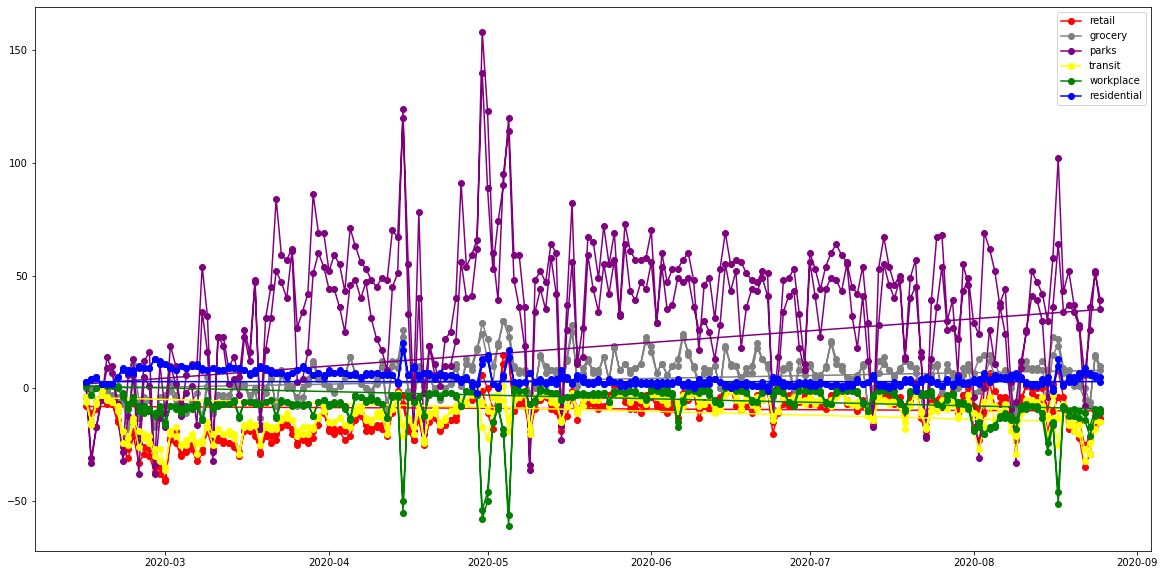

In [58]:
google_show_mobility()

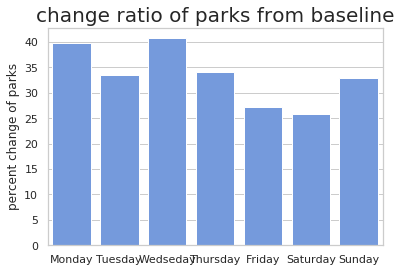

In [59]:
google_show_changerate_by_place(pdf_gm_kr_weekday,"parks","parks_percent_change_from_baseline")

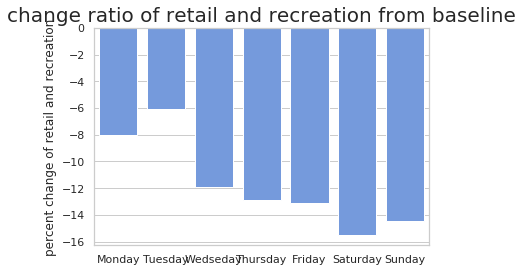

In [60]:
google_show_changerate_by_place(pdf_gm_kr_weekday,"retail and recreation","retail_and_recreation_percent_change_from_baseline")

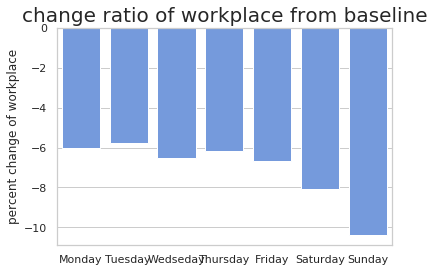

In [61]:
google_show_changerate_by_place(pdf_gm_kr_weekday,"workplace","workplaces_percent_change_from_baseline")

## 고밀도 문제 해결방법의 결론
### 1. 코로나 이후 노선별 사용량의 변화에 따라, 일부 노선의 운행은 줄이고 코로나 이후 사용률이 올라간 노선의 운행을 늘려 대중교통의 고밀도 문제를 해결할 수 있습니다.
### 2. 구글 모빌리티에 기반해 코로나 이후 사람들이 많이 가는 곳에 대한 노선 운행을 확대해 대중교통의 밀도를 낮혀 시민들의 안전을 보장해야합니다.
### 즉!!! 노선 데이터 분석과 구글 모빌리티 데이터 분석에 기반해 주기적인 대중교통 운행량 변화로 저밀도 운행수단을 제공해 시민들의 전염병 감염으로부터 안전을 보장할 수 있습니다.

#### 이어서 대중교통의 긴이동시간 문제를 해결해 감염가능성을 늦출수 있는 데이터 분석을 진행하겠습니다.

---
## 2-2. 긴 이동시간 문제 해결을 위한 데이터 분석(서울특별시 기준)
  ### 코로나 전/후로 정류장별 사용량 추이를 분석합니다. 사용량 추이에 따른 클러스터링 기법을 활용해서 정류장별 사용량 변화를 분석합니다. 
  ### 이를 이용해 노선에서 배제할 정류장을 정하고 노선을 간소화해서 대중교통 이동시간을 줄입니다.

## 2-2. 1) 코로나 전/후 정류장별 사용량 추이를 분석합니다. 클러스터링 기반으로 진행됩니다.

In [66]:
area = pd.read_csv("/dbfs/DD_AREA.dat",delimiter='|',header=None)
ts_station = pd.read_csv("/dbfs/DM_STTN_USEV_SMY.dat",delimiter='|',header=None) # 정류장 사용 데이터를 읽어옵니다.
ts_station[12] = ts_station[0].apply(lambda x: int(x/100)) #y-m-d를 y-m으로 변환합니다.
ts_station = ts_station[[7,9,10,1,11,12]].groupby([12,7,1]).sum().reset_index() #월,정류장이름, 정류장id로 groupby를 진행합니다. 즉, 월별로 정류장 이용량 데이터를 생성합니다.

In [67]:
ts_station.head()

,12,7,1,9,10,11
0,201901,(구)102보충대,42,24,6,30
1,201901,(구)검문소,26,200,10,210
2,201901,(구)검문소,48,55,19,74
3,201901,(구)단대동주민센터,41,24057,22920,46977
4,201901,(구)독정,41,9,84,93


### 정류장별 사용률의 변화데이터(시계열 데이터)를 활용해 클러스터링을 통해서 정류장별 특성을 분석하고자 했습니다.

### 클러스터링 분석을 위해 정류소별 사용량 데이터를 시계열 데이터로 만드는 feature engineering 작업을 진행합니다.
#### pyspark, scala, pandas를 복합적으로 활용해 진행했습니다.

In [70]:
df = spark.createDataFrame(ts_station.rename(columns={12:"date",7:"name",1:"region",9:"geton",10:"getoff",11:"all"})[ts_station[1]==11]).cache() # feature engineering을 위해 pandas dataframe을 spark dataframe으로 저장합니다.
udf_convert_date_index = udf(convert_date_index,IntegerType()) # date of month를 index로 변환합니다. 추후 시계열 데이터를 생성할 때 손쉬운 처리를 위함입니다.
df.withColumn("date_index",udf_convert_date_index("date")).write.mode("overwrite").parquet("/dbfs/df_sttn_use/")

In [71]:
%scala
val df = spark.read.parquet("/dbfs/df_sttn_use/") // scala spark로 작업하기 위해 데이터를 읽어옵니다.
val df_feature = df.select("name","geton","getoff","all","date_index").as[(String,Double,Double,Double,Double)]
  .groupByKey{case(name,geton,getoff,all,date_index)=>(name)}
  .mapGroups{case(key,value)=>
    val valueSeq = value.toSeq
    val valueMap = valueSeq.map{case(name,geton,getoff,all,date_index)=>(date_index-1,all)}.toMap
    val featureArray = Array.fill(10)(0.0).zipWithIndex.map{case(value,index)=>
           valueMap.getOrElse(index, 0.0)           
    }
    (key,featureArray)
    
  }
.toDF("name","feature")
df_feature.write.mode("overwrite").parquet("/dbfs/df_sttn_use_feature/") // 완성된 시계열 데이터 feature를 저장합니다.

#### 정류소별 시계열 데이터 feature는 아래와 같습니다.
##### 정류소별 사용량 변화를 시계열 feature로 재구성 했습니다. 
##### 예를들어 
     2호선교대역7번출구 : [9541, 8702, 9464, 9318, 9343, 7266, 6165, 4775, 5128, 5585]
     이고 시간은 2019년 1월, 2월,3월,4월,5월 2020년 1월,2월,3월,4월,5월 순입니다.

In [73]:
df_feature = spark.read.parquet("/dbfs/df_sttn_use_feature/")
df_feature.show()

+--------------------------------+--------------------+
 name| feature|
+--------------------------------+--------------------+
 2호선교대역7번출구|[9541.0, 8702.0, ...|
가양2단지성지아파트.동양고등학교|[45543.0, 41094.0...|
 갑을씨티텔앞|[17816.0, 15665.0...|
 개봉역.한마을아파트|[93053.0, 83953.0...|
 겸재정선미술관|[16650.0, 14455.0...|
 공덕역(중)|[28561.0, 23951.0...|
 공무원아파트|[54005.0, 44229.0...|
 꿈나래어린이집|[800.0, 255.0, 75...|
 난곡입구|[248972.0, 218379...|
 남강중고등학교입구|[159127.0, 140200...|
 답십리1동주민센터.래미안위브|[63765.0, 54185.0...|
 대방동주공아파트|[39181.0, 31210.0...|
 대왕파출소|[6440.0, 2329.0, ...|
 독립문초등학교|[2437.0, 1984.0, ...|
 래미안501동앞|[7608.0, 2071.0, ...|
 롯데삼강|[23611.0, 23416.0...|
 면목두산아파트4.5단지|[27158.0, 25654.0...|
 명지전문대.충암중고등학교|[110886.0, 92895....|
 문정시영가락프라자아파트|[32774.0, 29185.0...|
 방학동신동아타워|[83517.0, 75711.0...|
+--------------------------------+--------------------+
only showing top 20 rows

#### 클러스터링을 위해 normalization을 진행합니다.

In [75]:
df_npy = np.array(df_feature.collect()) # spark dataframe을 numpy로 변환합니다.
name_npy = np.array([np.array(x) for x in df_npy[:,0]])  # 정류장의 이름을 저장합니다.
feature_npy = np.array([np.array(x) for x in df_npy[:,1]]) # 정류장의 월별 사용성 시계열 데이터를 저장합니다.

def normalization_axis(feature):          # 클러스터링 작업을 위해 feature를 normalization 진행합니다.
  sum_npy = np.array([x/np.sum(x) for x in feature])
  return sum_npy

feature_norm_npy = normalization_axis(feature_npy)
feature_npy = np.array([np.array(x) for x in df_npy[:,1]])

### time series k-means clustering
### 정류소별 코로나 전/후 사용량 변화를 분석하기 위해 클러스터링(군집화)분석을 진행했습니다.
#### metric 은 euclidean을 사용했고 나머지 hyper-parameter를 튜닝했습니다. 
#### 총 5개의 클러스터로 정류소들을 분류합니다.

In [77]:
n_cluster = 5 # 하이퍼 파라메터 튜닝 결과 5개의 클러스터가 효율적입니다. 
km = TimeSeriesKMeans(n_clusters=n_cluster, metric="euclidean", max_iter=50,random_state=14).fit(feature_norm_npy) # 시계열 데이터를 euclidean 기반으로 시계열 클러스터링을 진행합니다.
rlt_tsm = km.predict(feature_norm_npy)

In [78]:
# 클러스터별 분포를 시각화하기 위한 전처리 작업니다.
labels = []
sizes = []
for i in range(n_cluster):
  labels.append("cluster_"+str(i))
  sizes.append(collections.Counter(rlt_tsm)[i])

### 클러스터링 결과 정류장의 사용류 변화에 따라서 크게 5개로 분류가 가능합니다.
### 또한 아래와 같은 비율로 분류됩니다. 

### PCA 차원축소를 이용해 클러스터의 분포를 확인해봤습니다. 
### 아래와 같이 이상적으로 정류장 데이터의 분류가 이뤄진 것을 확인할 수 있습니다.

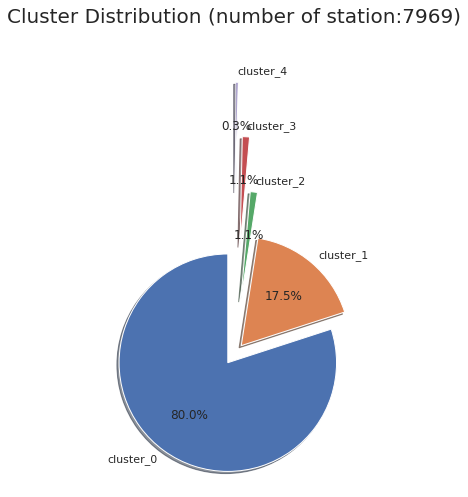

In [80]:
plt.figure(figsize=(10,5))
plt.pie(sizes,labels=labels,explode=[0.1,0.1,0.5,1.0,1.5],shadow=True,startangle=90,autopct='%1.1f%%')
plt.title("Cluster Distribution (number of station:7969)",position=(0.5,1.7),fontsize=20)

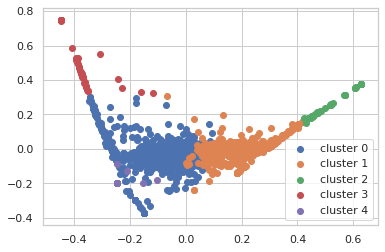

In [81]:
pca = PCA(n_components=2) # pca 진행으로 클러스터 분류가 잘 됐는지 확인합니다. 
rlt_pca = pca.fit_transform(feature_norm_npy)
for i in range(5):
  label_name = "cluster " +str(i)
  plt.scatter(rlt_pca[[rlt_tsm==i]][:,0],rlt_pca[[rlt_tsm==i]][:,1],label=label_name)
plt.legend()

In [82]:
def show_cluster_dist(num_cluster,num_sample=50):
  plt.figure(figsize=(10,4))
  size = sizes[num_cluster]
  if(size>num_sample):
    size = num_sample
  for i in range(size):
    name = "cluster" + str(i) 
    plt.plot(['201901','201902','201903','201904','201905','202001','202002','202003','202004','202005'],feature_norm_npy[[rlt_tsm==num_cluster]][i])
  plt.xlabel("date")
  plt.ylabel("ratio of usage")
  plt.axvline(5.8,color='red',label='COIVD-19 era',linewidth=1)
  plt.axvspan(5.8, 9.5, color='red', alpha=0.2)  
  plt.title("Changes in station usage rate of cluster "+str(num_cluster),fontsize=30)
  plt.legend()
  plt.show()

### 분류된 클러스터에 속한 정류장들의 사용량 변화 추세를 확인해보면 아래와 같습니다.

|클러스터 종류|특성|정류장 수|
|------|---|---|
|0번|코로나 이후 정류장 사용률이 약간 떨어짐|6375|
|1번|코로나 이후 정류장 사용률이 올라감|1398|
|2번|코로나 이후 정류장 사용률이 급격히 올라감|85|
|3번|코로나 이후 정류장 사용률이 급격히 떨어짐|26|
|4번|코로나 이후 정류장 사용률이 급격히 떨어짐|85|

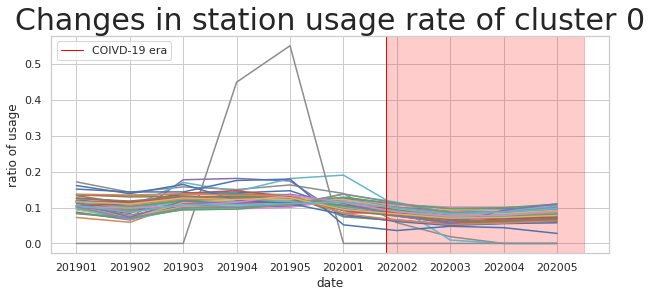

In [84]:
show_cluster_dist(0)

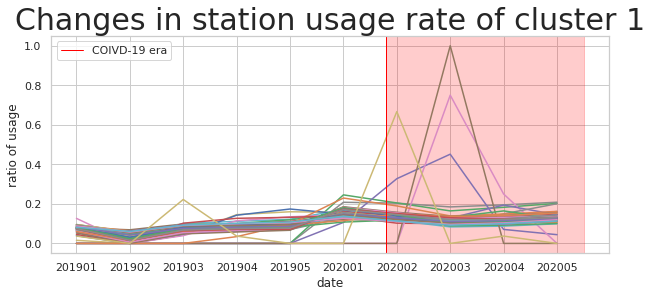

In [85]:
show_cluster_dist(1)

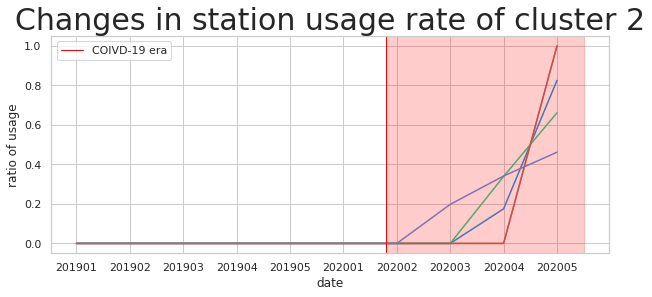

In [86]:
show_cluster_dist(2,5)

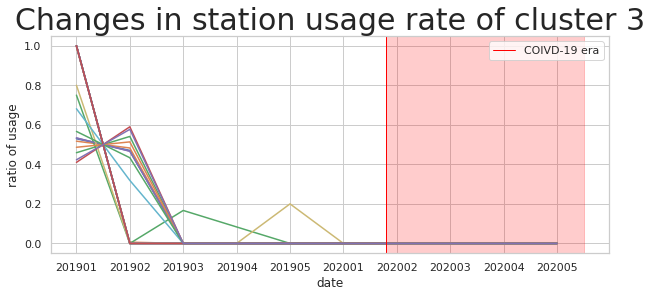

In [87]:
show_cluster_dist(3,25)

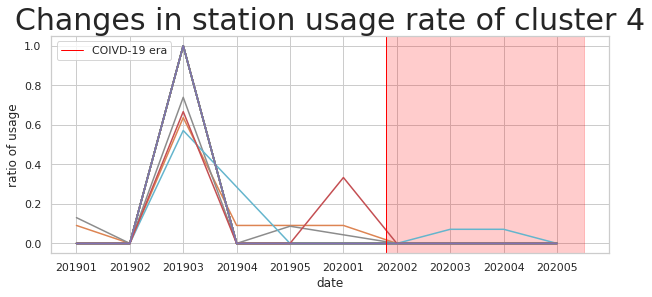

In [88]:
show_cluster_dist(4,25)

### - 정류소 클러스터 분석을 통한 결론
#### 앞에 데이터 분석 결과와 같이 서울시 정류장중에 코로나 발생이후 사용률이 급감하거나 0에 수렴하는 노선들이 존재합니다.
#### 즉, 1번,3번,4번 클러스터에 속한 정류장들을 노선에서 제거해서, 대중교통의 긴이동시간 문제를 해결할 수 있습니다. 
#### 이런 분석은 주기적으로 진행하고 노선 간소화를 유연하게 변화시켜 대중교통의 긴이동시간 문제를 해소하는 것이 중요합니다.

### 서울시 열린 데이터광장에서 버스 정류소의 위치 정보를 가져와 지도 상에 클러스터들의 위치를 확인해볼 수 있습니다. 
data source : https://data.seoul.go.kr/dataList/OA-15067/S/1/datasetView.do

In [91]:
pdf_location = pd.read_csv("/dbfs/location.csv",encoding='CP949',names=['number','name','x','y']) #정류장의 위치 정보를 받아옵니다.
def show_map_station(number_cluster):
  cluster0_location = pd.merge(pd.DataFrame(name_npy[[rlt_tsm==number_cluster]],columns=["name"]),pdf_location[['name','x','y']],how='left',on='name').dropna(axis=0)
  map_osm1 = folium.Map(location=[37.569765,126.987750], zoom_start=12)
  for i in cluster0_location.index:
    name = cluster0_location.loc[i,'name']
    lat = cluster0_location.loc[i,'y']
    lng = cluster0_location.loc[i,'x']
    marker = folium.CircleMarker([lat,lng],radius=1,popup=name)
    marker.add_to(map_osm1)
  return map_osm1 

### map을 띄우면 본 노트북의 로딩이 오래걸려 (렉걸림), display하지 않고 아래와 같이만 표현했습니다. 양해부탁드립니다.

In [93]:
show_map_station(0).save('/dbfs/cluster0.html')

## - 긴이동시간 문제 해결방법의 결론
### 앞에서 본 것과 같이 코로나 이후 정류소별 사용량의 변화에 따라, 일부 정류장들을 노선에서 제거해서 노선 간소화로 긴 이동시간 문제를 해결할 수 있습니다. 
### 대중교통의 이동시간을 감소시켜 감염병에 노출될 수 있는 확률을 낮춰 시민들의 이동안전을 도모할 수 있습니다.

---
#### 이어서 고밀도, 긴이동시간 해결을 위해 대중교통의 운행량을 변화시키다 보면 side effect을 일으킬 수 있습니다. 이 문제를 해결할 수 있는 방법을 데이터 분석관점으로 제안해보겠습니다.

## 2-3. 1) 고밀도, 긴 이동시간 문제 해결에 따른 side effect 보완방법
### 정류장이 노선에서 배제될 경우, 아주 간헐적으로 해당 대중교통을 사용하는 시민들은 불편함을 겪을 수 있습니다. 하지만 많지는 않을것으로 보입니다.
### 1. 이런 경우는 아래와 같이 서울시에서 제공하고 있는 따릉이를 활용해 문제를 해결할 수 있습니다.

In [97]:
def show_bike_usage():
  pdf_bike = pd.read_csv("/dbfs/bike_day_1_5.csv", error_bad_lines=False,encoding='CP949') # 공공자전거의 사용률 데이터를 읽어옵니다.
  pdf_bike['date']=pdf_bike['대여일자'].apply(lambda x: "2020-0"+str(datetime.datetime.strptime(x,'%Y-%m-%d').date().month)) #사용성 데이터의 날짜 데이터를 가공합니다.
  temp = pdf_bike.groupby(['date']).sum().reset_index()
  plt.figure(figsize=(10,5))
  rank = temp['이용건수'].argsort().argsort()
  pal = sns.color_palette("Blues_d", temp.shape[0])
  sns.barplot(x="date",y="이용건수",data=temp,palette=np.array(pal[::-1])[rank])
  plt.xlabel("month of 2020")
  plt.ylabel("sum of usage")
  plt.axvline(0.5,color='red',label='COIVD-19 era',linewidth=1)
  plt.axvspan(0.5, 5.0, color='red', alpha=0.2)  
  plt.title("usage of common bike",fontsize=20)
  plt.legend()
  plt.show()

### 아래 데이터 분석 결과와 같이 따릉이(서울 공공자전거)는 코로나 발생 이후 사용률이 증가하고 있습니다.
### 시민들의 사용 의지가 높아지는 것을 말하기도 합니다. 노선에서 배제된 정류장들과 서울시 전역에 공공자전거 배치를 통해서 대중교통의 저밀도화 이동시간 단축화를 이룰수 있습니다.

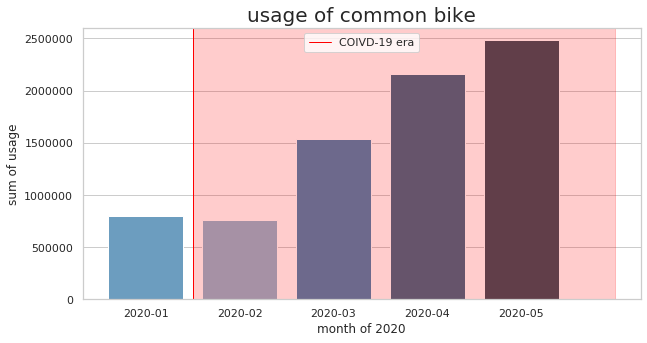

In [99]:
show_bike_usage()

### 2. 서울시가 운영하는 나눔카의 사용률 및 회원수가 계속해서 증가하고 있습니다. 나눔카의 확대로도 시민들의 안전한 이동을 제공할 수 있습니다.

## - 고밀도, 긴 이동시간 문제 해결에 따른 side effect 보완방법 결론
### 앞에서 본 것과 같이 공공자전거, 나눔카, 공유킥보드 서비스 등의 확대로 대중교통 운행량 조절에 따른 side effect를 보완할 수 있습니다. 
### 이를 통해 시민들의 감염병에 노출될 수 있는 확률을 낮춰 안전을 도모할 수 있습니다.

---
## 3. 결론 및 제언 : 향후 정책에 반영할 점들 
### 대중교통 데이터(노선과 정류소), 구글 모빌리티 데이터, 공공자전거 데이터 분석으로 감염병을 최소화할 수 있는 방법에 대해 제안했습니다. 
### 앞서 확인한 데이터 분석 결과로 대중교통의 고밀도와 긴이동시간 문제를 해결해서 시민들의 안전한 이동 및 감염을 최소화할 수 있습니다. 

#### 해결법 정리
##### 1. 노선 분류를 통해 코로나 이후 사용률이 급격히 감소되거나 0이된 노선들의 운행량을 조절합니다. 그리고 코로니 이후 사용률이 증가한 노선들의 운행량을 조절해 대중교통 밀도를 조절할 수 있습니다.
##### 2. 시민들의 모빌리티 분석으로 코로나이후 많이 방문하는 곳의 노선 운행량을 조절합니다. 증가시켜서 해당 노선들의 밀도를 낮추어, 시민들의 안전한 이동을 보장할 수 있습니다. 
##### 3. 정류장 분류를 통해 코로나 이후 사용률이 급격히 감소되거나 0이된 정류장들을 노선에서 배제합니다. 이를 통해 대중교통의 긴 이동시간 문제를 해결해 시민들의 감영에 노출될 시간을 최소화할 수 있습니다.
##### 4. 공공자전거 제공을 확대해서 앞의 해결법들에 의한 side effect 문제를 최소화할 수 있습니다. 코로나 이후 공공자전거 사용률이 증가하고 인식이 바뀌고 있어 좋은 효과를 보일것으로 보입니다. 

### 앞서 제안드린 해결법들은 주기적인 데이터 분석을 활용해 유연하게 운행량을 조절할 것을 제안합니다. 이를 통해서 국가 상황에 따른 스마트한 대중교통 시스템이 구축될 것입니다.